Home Work 2  (Prob Stat) 

จิรวัฒน์ แก้วกุลบุตร (60010143)

In [1]:
print("Hello Home Work 2 in (ProbStat)!")


Hello Home Work 2 in (ProbStat)!


In [2]:
import pandas as pd
import stemgraphic 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def estimate_gaussian(dataset):

    mu = np.mean(dataset)#moyenne cf mu
    sigma = np.std(dataset)#écart_type/standard deviation
    limit = sigma * 0.2
#     print(sigma)

    min_threshold = mu - limit
    max_threshold = mu + limit

    return mu, sigma, min_threshold, max_threshold

In [4]:
data = pd.read_csv("E:\Development\Prob Stat\HW2\covid-testing-xlsx_csv.csv")
print("row size and column size :",data.shape)
data.head()

row size and column size : (14520, 16)


,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [5]:
#เลือก Column เพื่อนำมาสร้าง DataFrame ใหม่ นำมาเฉพาะข้อมูลที่สนใจ
columns = list(data.columns)
print("size of column Data",len(columns))
index=0
for i in columns :
    print('id:',index,'name of column :',i)
    index+=1
    
useIdColumn = [1,2,3,4,5,6]
useColumn = []
for i in useIdColumn :
        useColumn.append(columns[i])
useColumn

size of column Data 16
id: 0 name of column : iso_code
id: 1 name of column : location
id: 2 name of column : date
id: 3 name of column : total_cases
id: 4 name of column : new_cases
id: 5 name of column : total_deaths
id: 6 name of column : new_deaths
id: 7 name of column : total_cases_per_million
id: 8 name of column : new_cases_per_million
id: 9 name of column : total_deaths_per_million
id: 10 name of column : new_deaths_per_million
id: 11 name of column : total_tests
id: 12 name of column : new_tests
id: 13 name of column : total_tests_per_thousand
id: 14 name of column : new_tests_per_thousand
id: 15 name of column : tests_units


['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths']

In [6]:
dataFrame = data[useColumn]
dataFrame.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths
0,Aruba,2020-03-13,2,2,0,0
1,Aruba,2020-03-20,4,2,0,0
2,Aruba,2020-03-24,12,8,0,0
3,Aruba,2020-03-25,17,5,0,0
4,Aruba,2020-03-26,19,2,0,0


In [7]:
total_cases = dataFrame.pivot_table(index=['location'], aggfunc='size')
modetotal_cases = max(list(total_cases))
print("จำนวนวันที่รายงานของผู้ติดเชื้อในแต่ล่ะประเทศ /วัน :",total_cases)
print("ค่าฐานนิยมจำนวนวันที่รายงานของผู้ติดเชื้อในแต่ล่ะประเทศ (Mode) :",modetotal_cases)
new_cases = dataFrame.pivot_table(index=['new_cases'], aggfunc='size')
modeNew_cases= max(list(new_cases))
print("ค่าฐานนิยมผู้ป่วยใหม่ทั้งหมด ในแต่ล่ะประเทศ(Mode) :",modeNew_cases)


จำนวนวันที่รายงานของผู้ติดเชื้อในแต่ล่ะประเทศ /วัน : location
Afghanistan       114
Albania            55
Algeria           119
Andorra            50
Angola             42
                 ... 
Vietnam           123
Western Sahara      7
Yemen              23
Zambia             45
Zimbabwe           42
Length: 209, dtype: int64
ค่าฐานนิยมจำนวนวันที่รายงานของผู้ติดเชื้อในแต่ล่ะประเทศ (Mode) : 124
ค่าฐานนิยมผู้ป่วยใหม่ทั้งหมด ในแต่ล่ะประเทศ(Mode) : 6485


In [8]:


max_total_cases = dataFrame['total_cases'].max()
min_total_cases = dataFrame['total_cases'].min()
mean_total_cases = dataFrame['total_cases'].mean()
print("จำนวนผู้ติดเชื้อ : (max = %d"%max_total_cases,"min = %d"%min_total_cases,"min mean = %.6f)"%mean_total_cases)


max_new_cases = dataFrame['new_cases'].max()
min_new_cases = dataFrame['new_cases'].min()
mean_new_cases = dataFrame['new_cases'].mean()
print("จำนวนผู้ติดเชื้อใหม่ : (max = %d"%max_new_cases,"min = %d"%min_new_cases,"min mean = %.6f)"%mean_new_cases)



max_total_deaths = dataFrame['total_deaths'].max()
min_total_deaths = dataFrame['total_deaths'].min()
mean_total_deaths = dataFrame['total_deaths'].mean()
print("จำนวนผู้ผู้เสีย : (max = %d"%max_total_deaths,"min = %d"%min_total_deaths,"min mean = %.6f)"%mean_total_deaths)


max_new_deaths = dataFrame['new_deaths'].max()
min_new_deaths = dataFrame['new_deaths'].min()
mean_new_deaths = dataFrame['new_deaths'].mean()
print("จำนวนผู้ผู้เสียใหม่ : (max = %d"%max_new_deaths,"min = %d"%min_new_deaths,"min mean = %.6f)"%mean_new_deaths)


จำนวนผู้ติดเชื้อ : (max = 1103781 min = 0 min mean = 5227.129959)
จำนวนผู้ติดเชื้อใหม่ : (max = 48529 min = -1430 min mean = 227.748209)
จำนวนผู้ผู้เสีย : (max = 65068 min = 0 min mean = 336.008058)
จำนวนผู้ผู้เสียใหม่ : (max = 4928 min = 0 min mean = 16.420386)


In [9]:
dStd = dataFrame[['total_cases','new_cases','total_deaths','new_deaths']]
dStd.std(axis = 0, skipna = True) 

total_cases     37317.353000
new_cases        1592.297524
total_deaths     2548.384064
new_deaths        124.138047
dtype: float64

['total_cases', 'new_cases', 'total_deaths', 'new_deaths']


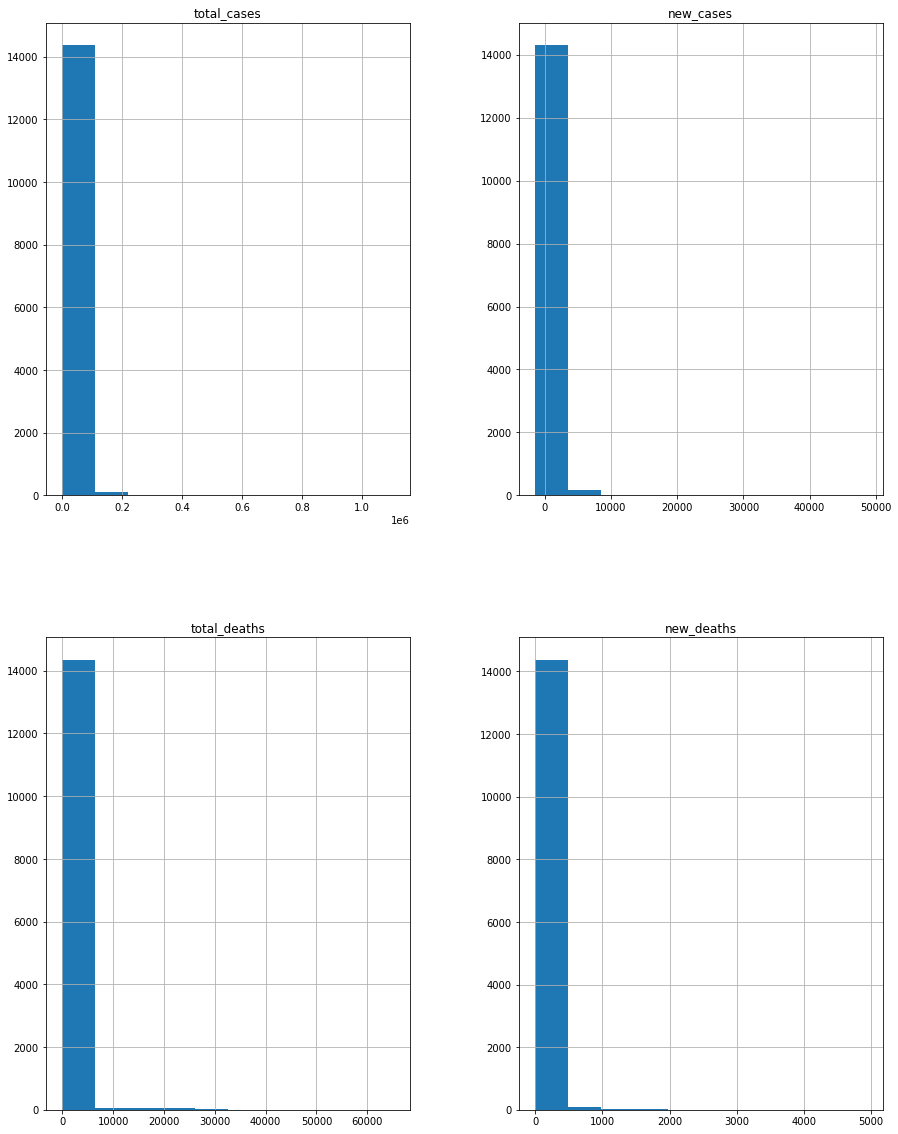

In [10]:
useIdColumn = [3,4,5,6]
useColumn = []
for i in useIdColumn :
        useColumn.append(columns[i])
print(useColumn)
dataFrame = data[useColumn]
dataFrame.head()
hist = dataFrame.hist(figsize = (15,20))


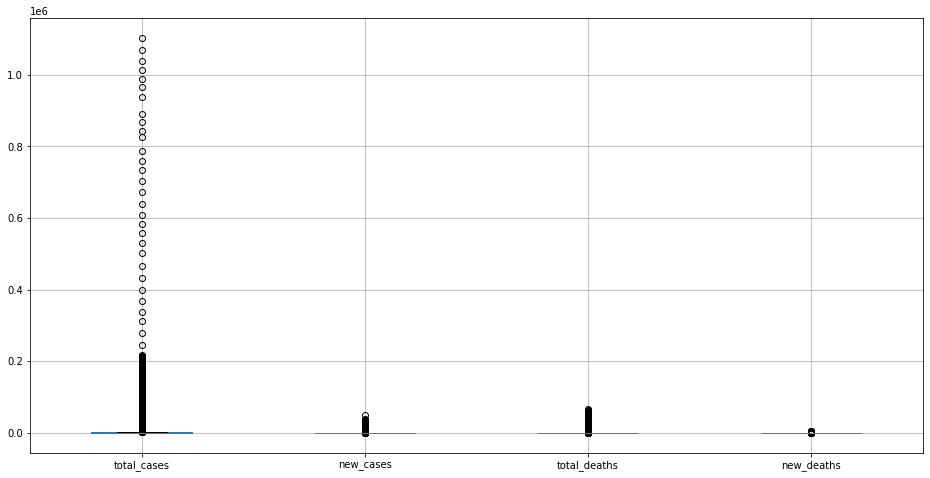

In [11]:
dataFrame = data[useColumn]
boxplot = dataFrame.boxplot(figsize = (16,8))

Stem and Leaf with column : total_cases
(<Figure size 540x1116 with 1 Axes>, <matplotlib.axes._axes.Axes object at 0x000001760A256070>)
Stem and Leaf with column : new_cases
(<Figure size 540x972 with 1 Axes>, <matplotlib.axes._axes.Axes object at 0x000001760A1628B0>)


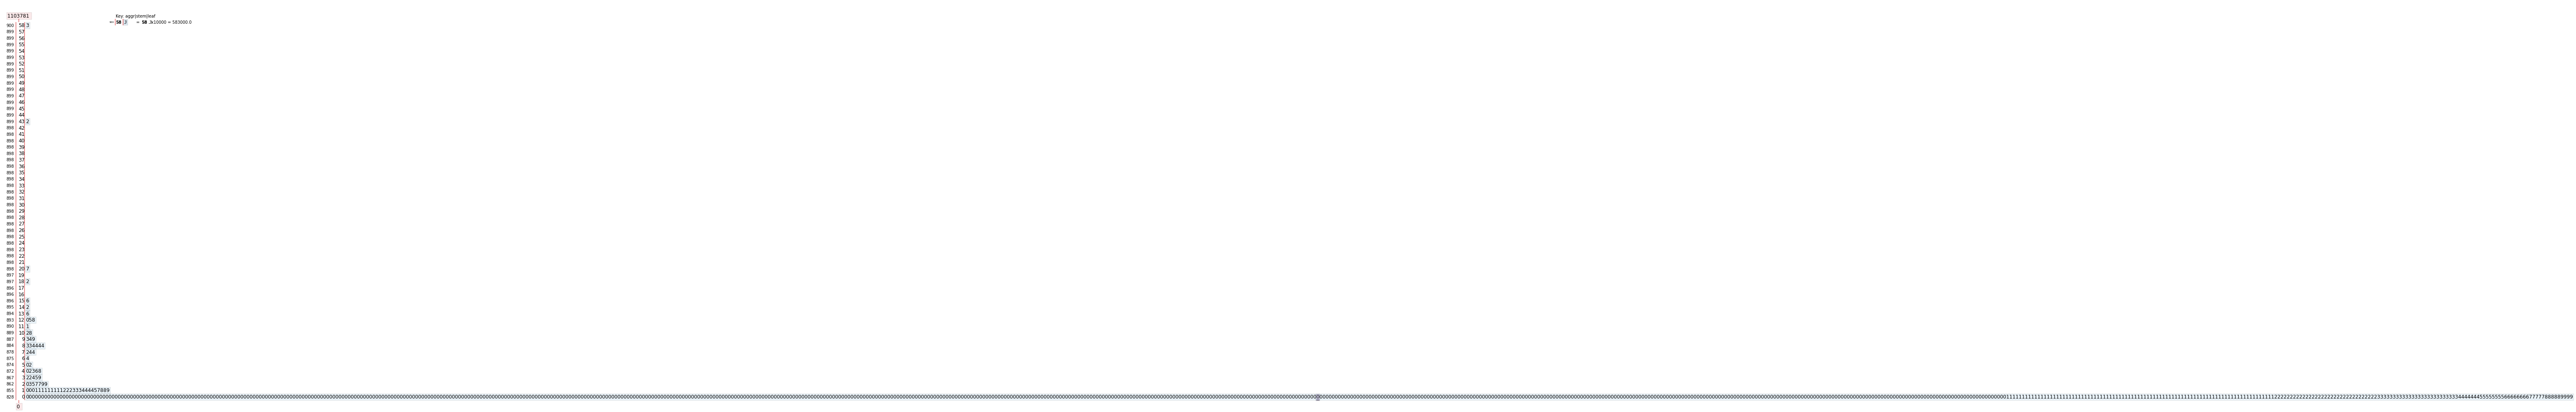

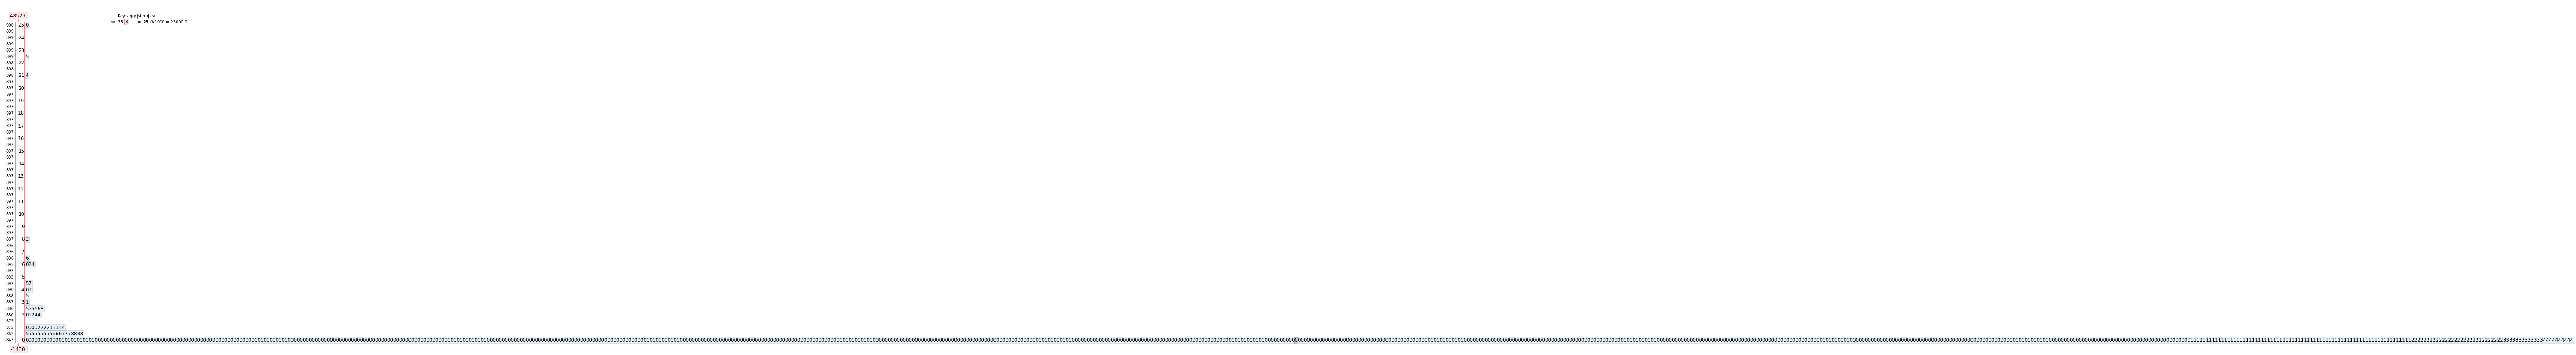

In [12]:
for i in range(0,2) :
    ListData = dataFrame[useColumn[i]].values.tolist()
    stemData = pd.Series(ListData)
    print ("Stem and Leaf with column :",useColumn[i])
    print(stemgraphic.stem_graphic(stemData))
# print(ageList)

['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths']


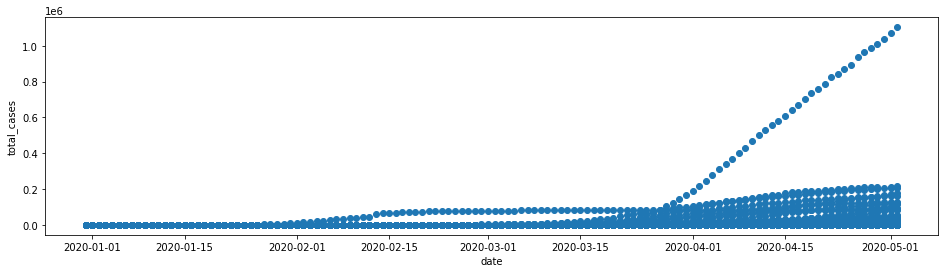

In [15]:
useIdColumn = [2,3,4,5,6]
useColumn = []
for i in useIdColumn :
        useColumn.append(columns[i])
print(useColumn)
dataFrame = data[useColumn]

mu, sigma, min_threshold, max_threshold = estimate_gaussian(dataFrame['total_cases'].values)
condition1 = (dataFrame['total_cases'] < min_threshold)
condition2 = (dataFrame['total_cases'] > max_threshold)

outliers = np.extract(condition2, dataFrame['total_cases'])
dfTime = pd.to_datetime(dataFrame['date'],format= '%Y-%m-%d' )

# df_red = dataFrame[dataFrame['total_cases'].values==outliers]
# df

plt.scatter(dfTime,dataFrame['total_cases'])
# plt.scatter(df_red['total_cases'],df_red['date'],c='red')
plt.xlabel("date")
plt.ylabel("total_cases")
show = plt.rcParams["figure.figsize"] = (16,4)



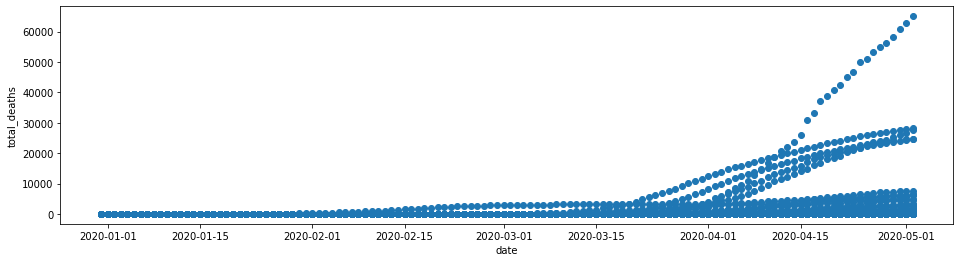

In [14]:
plt.scatter(dfTime,dataFrame['total_deaths'])
# plt.scatter(df_red['total_cases'],df_red['date'],c='red')
plt.xlabel("date")
plt.ylabel("total_deaths")
show = plt.rcParams["figure.figsize"] = (16,4)